<a href="https://colab.research.google.com/github/alejo27perez/LAB-5-Variabilidad-de-la-Frecuencia-Cardiaca-usando-la-Transformada-Wavele/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/qhm2ckjhrb84br3/nina.png

--2026-02-17 20:02:16--  https://www.dropbox.com/s/qhm2ckjhrb84br3/nina.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/0q16egy0mm5u4dmokrvq6/nina.png?rlkey=idsx5c2l1q9jhnk4tym9qjhd0 [following]
--2026-02-17 20:02:16--  https://www.dropbox.com/scl/fi/0q16egy0mm5u4dmokrvq6/nina.png?rlkey=idsx5c2l1q9jhnk4tym9qjhd0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0ef10b3b00a3cbd0ff3daefe5.dl.dropboxusercontent.com/cd/0/inline/C7HxWT1txHsUvquKg2V6Sh_-CCzV43vo8xNsLWW_MMWXzquq5Vb2uG-Mo9dFszlWrSuV5IvhC8VCbZGmgiVSw7XxeRuArabLOEIKkkGeZkQQuVgC8GgGoSiZOXfG7YtcS7_iotPEplAbTtnmz2Ba3kJ7/file# [following]
--2026-02-17 20:02:16--  https://ucb0ef10b3b00a3cbd0ff3daefe5.dl.dropboxusercontent.com/cd/0/inline/C7HxWT1txHsUv

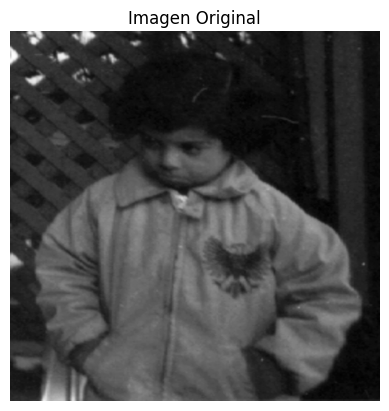

In [2]:
import cv2
import matplotlib.pyplot as plt

# Cargar en escala de grises
img = cv2.imread("nina.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")
plt.show()


In [3]:
import numpy as np

def mostrar_histograma(imagen, titulo="Histograma"):
    plt.figure()
    plt.hist(imagen.ravel(), bins=256, range=[0,256])
    plt.title(titulo)
    plt.xlabel("Nivel de intensidad")
    plt.ylabel("Número de píxeles")
    plt.show()


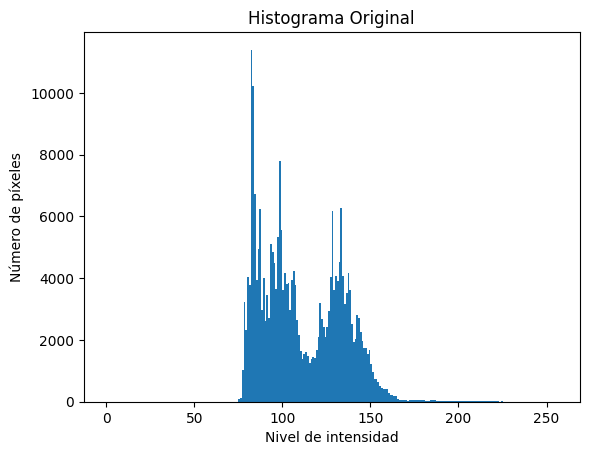

In [4]:
mostrar_histograma(img, "Histograma Original")


In [5]:
def ecualizar_histograma(imagen):
    return cv2.equalizeHist(imagen)


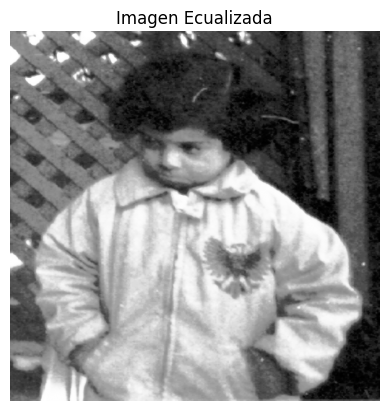

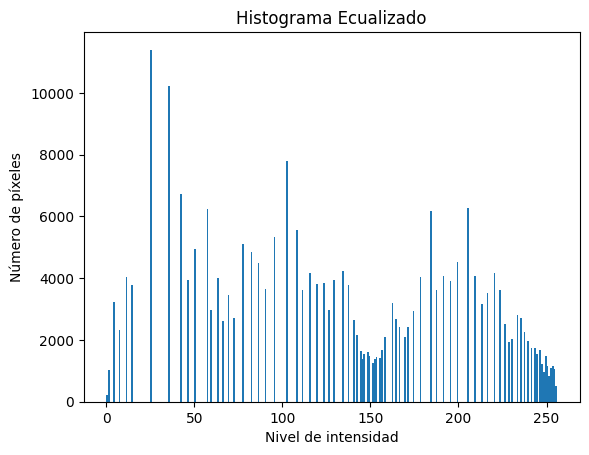

In [6]:
img_eq = ecualizar_histograma(img)

plt.imshow(img_eq, cmap='gray')
plt.title("Imagen Ecualizada")
plt.axis("off")
plt.show()

mostrar_histograma(img_eq, "Histograma Ecualizado")


In [7]:
def ecualizacion_uniforme(imagen):
    hist, bins = np.histogram(imagen.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalizado = cdf * 255 / cdf[-1]

    imagen_ecu = np.interp(imagen.flatten(), bins[:-1], cdf_normalizado)
    return imagen_ecu.reshape(imagen.shape).astype(np.uint8)


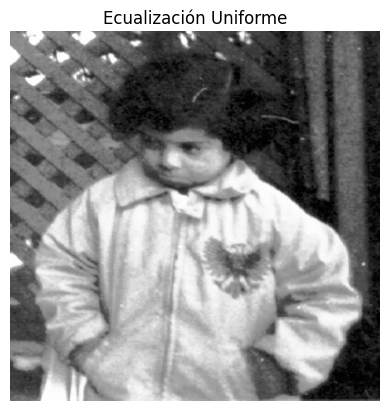

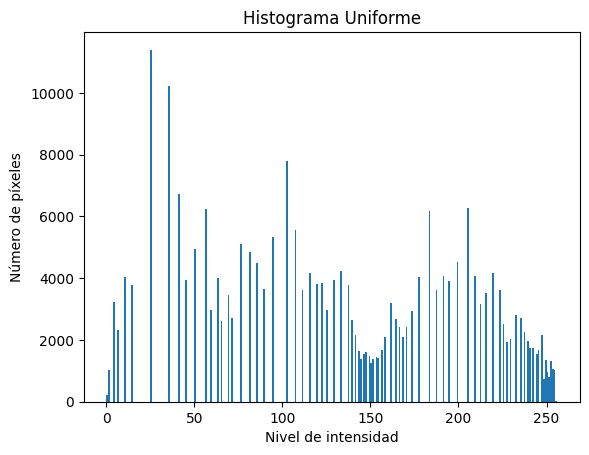

In [8]:
img_uni = ecualizacion_uniforme(img)

plt.imshow(img_uni, cmap='gray')
plt.title("Ecualización Uniforme")
plt.axis("off")
plt.show()

mostrar_histograma(img_uni, "Histograma Uniforme")


In [9]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.1 MB/s eta 0:00:00


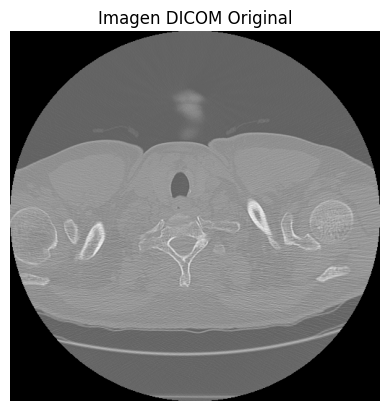

In [14]:
import pydicom

ds = pydicom.dcmread("image-00003.dcm")
img_dicom = ds.pixel_array

plt.imshow(img_dicom, cmap='gray')
plt.title("Imagen DICOM Original")
plt.axis("off")
plt.show()


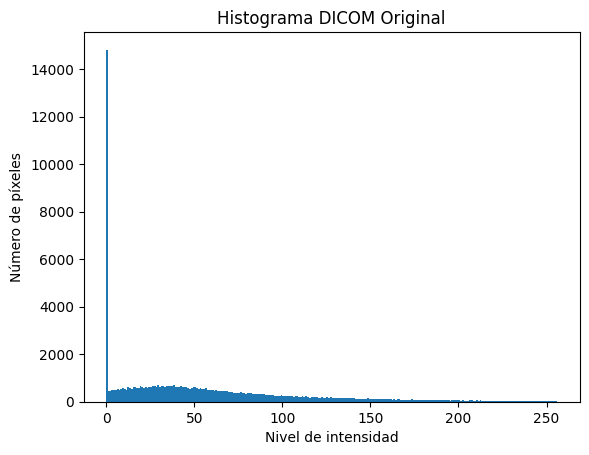

In [15]:
mostrar_histograma(img_dicom, "Histograma DICOM Original")


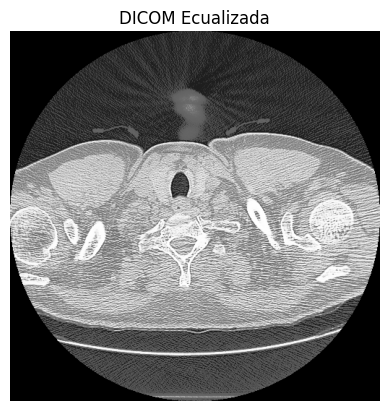

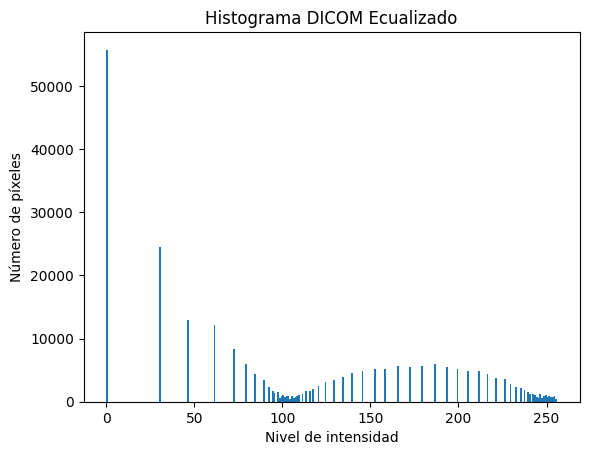

In [16]:
img_norm = cv2.normalize(img_dicom, None, 0, 255, cv2.NORM_MINMAX)
img_norm = img_norm.astype(np.uint8)

img_dicom_eq = cv2.equalizeHist(img_norm)

plt.imshow(img_dicom_eq, cmap='gray')
plt.title("DICOM Ecualizada")
plt.axis("off")
plt.show()

mostrar_histograma(img_dicom_eq, "Histograma DICOM Ecualizado")


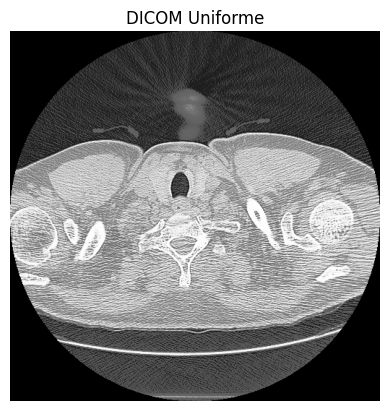

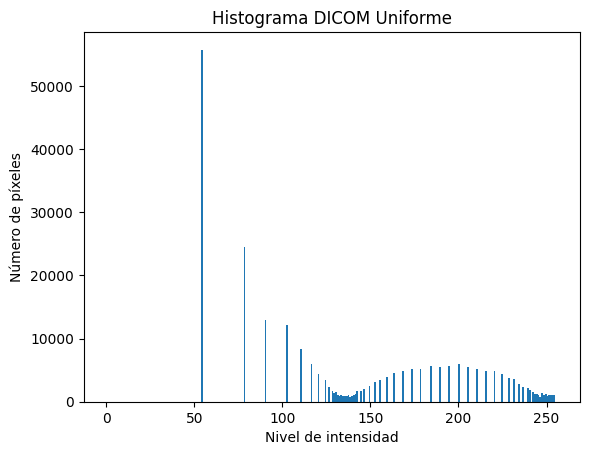

In [17]:
img_dicom_uni = ecualizacion_uniforme(img_norm)

plt.imshow(img_dicom_uni, cmap='gray')
plt.title("DICOM Uniforme")
plt.axis("off")
plt.show()

mostrar_histograma(img_dicom_uni, "Histograma DICOM Uniforme")
